<a href="https://colab.research.google.com/github/nandhu6523/Fake_News_Prediction/blob/main/fakenewspredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas scikit-learn matplotlib

In [2]:
from google.colab import files
uploaded = files.upload()

Saving news1.csv to news1.csv


In [3]:
import os
print(os.listdir('/content'))

['.config', 'news1.csv', 'sample_data']


In [7]:
from google.colab import files

uploaded = files.upload()  # Use the file upload dialog to select both files

import os

# Create the 'models' directory if it doesn't exist
os.makedirs('/content/models/', exist_ok=True)

for filename, data in uploaded.items():
  with open(os.path.join('/content/models/', filename), 'wb') as f:
    f.write(data)
  print(f'{filename} uploaded and saved to /content/models/')

Saving model.pkl to model (2).pkl
Saving vectorizer.pkl to vectorizer (2).pkl
model (2).pkl uploaded and saved to /content/models/
vectorizer (2).pkl uploaded and saved to /content/models/


In [8]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle
import os

In [9]:
def load_data(file_path):
    df = pd.read_csv(file_path)
    print("Data loaded successfully!")
    return df

def preprocess_text(text):
    """Preprocess the input text by removing URLs, mentions, and special characters."""
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove punctuation and numbers
    return text.lower()

def process_data(df):
    """Process the dataset: handle missing values and preprocess text."""
    print("Missing values before processing:\n", df.isnull().sum())
    df.dropna(inplace=True)  # Drop rows with missing values
    df['text'] = df['text'].apply(preprocess_text)
    print("Data processed successfully!")
    return df

In [10]:
def visualize_class_distribution(df):
    df['label'].value_counts().plot(kind='bar')
    plt.title('Class Distribution')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.show()

def extract_features(X_train, X_test):
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), max_df=0.7)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)
    return X_train_tfidf, X_test_tfidf, vectorizer

In [11]:
def train_model(X_train_tfidf, y_train):
    model = LogisticRegression()
    model.fit(X_train_tfidf, y_train)
    return model

def evaluate_model(model, X_test_tfidf, y_test):
    y_pred = model.predict(X_test_tfidf)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

def save_model(model, vectorizer):
    with open('/content/model.pkl', 'wb') as model_file:
        pickle.dump(model, model_file)
    with open('/content/vectorizer.pkl', 'wb') as vec_file:
        pickle.dump(vectorizer, vec_file)
    print("Model and vectorizer saved successfully in /content!")
    print("Files in /content directory:", os.listdir('/content'))

Data loaded successfully!
Missing values before processing:
 text     0
label    0
dtype: int64
Data processed successfully!


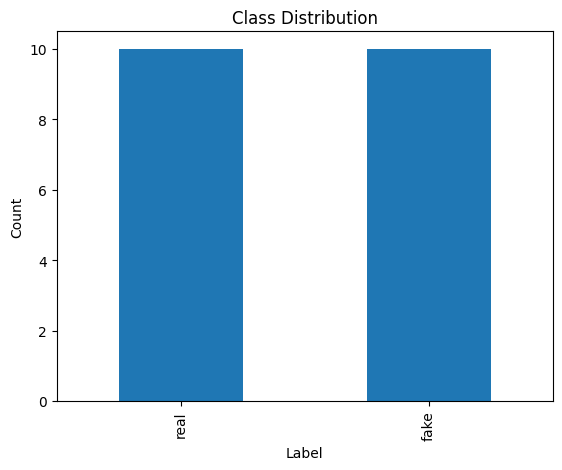

Accuracy: 0.25
Confusion Matrix:
 [[0 3]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.25      1.00      0.40         1

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4

Model and vectorizer saved successfully in /content!
Files in /content directory: ['.config', 'models', 'model.pkl', 'vectorizer (1).pkl', 'model (1).pkl', 'model (2).pkl', 'news1.csv', 'vectorizer.pkl', 'vectorizer (2).pkl', 'sample_data']


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [12]:
# Main Execution
if __name__ == "__main__":
    # Load and process the dataset
    df = load_data('/content/news1.csv')  # Ensure you have uploaded the file to /content in Colab
    df = process_data(df)

    # Visualize class distribution
    visualize_class_distribution(df)

    # Encode labels to numeric
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(df['label'])

    # Split the data
    X = df['text']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Extract features
    X_train_tfidf, X_test_tfidf, vectorizer = extract_features(X_train, X_test)

    # Train the model
    model = train_model(X_train_tfidf, y_train)

    # Evaluate the model
    evaluate_model(model, X_test_tfidf, y_test)

    # Save the model and vectorizer
    save_model(model, vectorizer)